In [55]:
from scipy.stats import norm
import numpy as np
import matplotlib.pylab as plt

In [56]:
#these values are given
sigma = 0.2
S0 = 100
r = 0.05
maturity = 1/12
K = 100

In [57]:
def phi(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    return norm.cdf(d1)


def psi_Bt(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return -K*np.exp(-r*T)*norm.cdf(d2)


def simulate_Brownian_Motion(paths, steps, T):
    deltaT = T/steps
    t = np.linspace(0, T, steps+1)
    X = np.c_[np.zeros((paths, 1)),
              np.random.randn(paths, steps)]
    return t, np.cumsum(np.sqrt(deltaT) * X, axis=1)

## single path at N =21

In [58]:
paths = 1
steps = 21 * 84 #1000

T, W_T = simulate_Brownian_Motion(paths, steps, maturity)

In [59]:
#size of step
dt = maturity / steps


blackscholespath = S0*np.exp((r-sigma**2/2)*T + sigma*W_T[0])
#number of steps + 1 in a brownian path
blackscholespath.shape

(1765,)

In [60]:
deltas = []
stockhedge_errors = []
bondhedge_errors = []
hedged_portfolios = []
stock_holdings = []
bond_holdings = []
hedge_count = 0
hedge_list = []
N = 21 #number of hedging steps

for i, (t, S_t) in enumerate(zip(T, blackscholespath)):
    
    stock_pos = phi(S_t, K, r, sigma, maturity-t)*S_t #supposed stock pos if hedged at every instance
    bond_pos = psi_Bt(S_t, K, r, sigma, maturity-t) #supposed bond pos if hedged at every instance
    
    if (t == 0 or i%(steps/N) == 0) and i!= steps :
        #at t == 0 and at every hedging step, excluding last step
        
        stock_holdings.append(stock_pos)
        bond_holdings.append(bond_pos)
        V_t = stock_pos + bond_pos
        
        #keeping record of hedge
        hedge_count = hedge_count + 1
        hedge_list.append(i)
        
        hedged_portfolios.append(V_t)
        
        if t == 0.0:
            stockhedge_errors.append(0)
            bondhedge_errors.append(0)

        else:
            stockhedge_errors.append(prev_phi*S_t - stock_pos)
            bondhedge_errors.append(prev_bond_pos*np.exp(r*dt*n) - bond_pos)
        
        #only update at hedging step
        prev_phi = phi(S_t, K, r, sigma, maturity-t)
        prev_bond_pos = bond_pos
        n=0 #reset n to be 0 (n is number of steps between 1 hedge and another hedge)

    if (t > 0 and  i%(steps/N) != 0) or i==steps:
    #at every step that has no hedging:
        n = n + 1
        V_t = prev_phi* S_t + prev_bond_pos *np.exp(r*dt*n)
        stock_holdings.append(prev_phi* S_t)
        bond_holdings.append(prev_bond_pos *np.exp(r*dt*n))
    
        hedged_portfolios.append(V_t)
        
        stockhedge_errors.append(prev_phi*S_t - stock_pos)
        bondhedge_errors.append(prev_bond_pos*np.exp(r*dt*n) - bond_pos)
    
    deltas.append(phi(S_t, K, r, sigma, maturity-t))
    

C:\Users\Statistician\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\Statistician\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


In [61]:
# check number of hedge performed
hedge_count

21

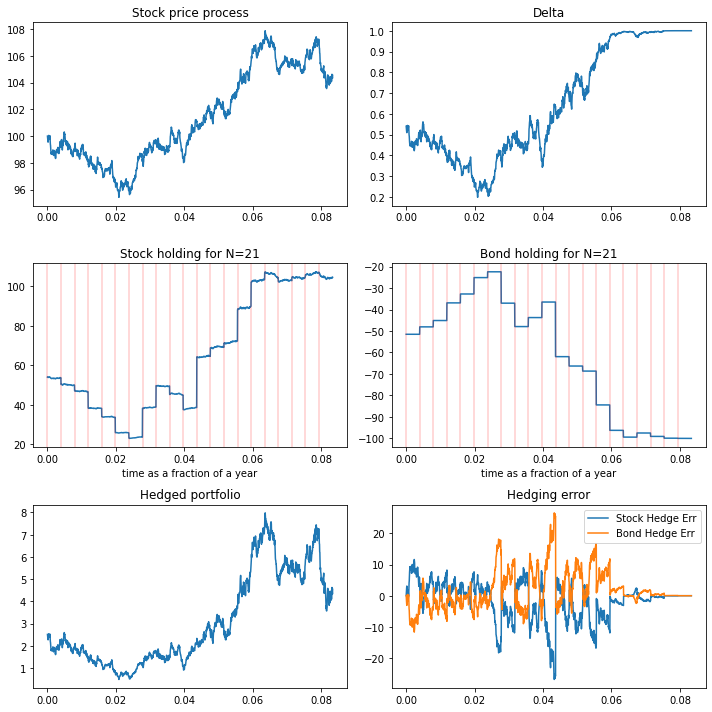

In [62]:
plt.figure(tight_layout=True, figsize=(10, 10))
plt.subplot(321)
plt.plot(T, blackscholespath)
plt.title('Stock price process')
plt.subplot(322)
plt.plot(T, deltas)
plt.title('Delta')
plt.subplot(323)
plt.plot(T, stock_holdings)
for xc in T[hedge_list]:
    plt.axvline(x=xc, color='r', linestyle='-', linewidth=0.3)
plt.title('Stock holding for N=21')
plt.xlabel("time as a fraction of a year")
plt.subplot(324)
plt.plot(T, bond_holdings)
for xc in T[hedge_list]:
    plt.axvline(x=xc, color='r', linestyle='-', linewidth=0.3)
plt.title('Bond holding for N=21')
plt.xlabel("time as a fraction of a year")
plt.subplot(325)
plt.plot(T, hedged_portfolios)
plt.title('Hedged portfolio')
plt.subplot(326)
plt.plot(T, stockhedge_errors, label='Stock Hedge Err')
plt.plot(T, bondhedge_errors, label='Bond Hedge Err')
plt.legend()
plt.title('Hedging error')
plt.show()


## single path at N =84

In [65]:
paths = 1
steps = 21 * 84 #1000

T, W_T = simulate_Brownian_Motion(paths, steps, maturity)

dt = maturity / steps
blackscholespath = S0*np.exp((r-sigma**2/2)*T + sigma*W_T[0])

In [66]:
deltas = []
stockhedge_errors = []
bondhedge_errors = []
hedged_portfolios = []
stock_holdings = []
bond_holdings = []
hedge_count = 0
hedge_list = []
N = 84 #number of hedging steps

for i, (t, S_t) in enumerate(zip(T, blackscholespath)):
    
    stock_pos = phi(S_t, K, r, sigma, maturity-t)*S_t #supposed stock pos if hedged at every instance
    bond_pos = psi_Bt(S_t, K, r, sigma, maturity-t) #supposed bond pos if hedged at every instance
    
    if (t == 0 or i%(steps/N) == 0) and i!= steps :
        #at t == 0 and at every hedging step, excluding last step
        stock_holdings.append(stock_pos)
        bond_holdings.append(bond_pos)
        V_t = stock_pos + bond_pos
        
        hedge_count = hedge_count + 1
        hedge_list.append(i)
        
        hedged_portfolios.append(V_t)
        
        if t == 0.0:
            stockhedge_errors.append(0)
            bondhedge_errors.append(0)

        else:
            stockhedge_errors.append(prev_phi*S_t - stock_pos)
            bondhedge_errors.append(prev_bond_pos*np.exp(r*dt*n) - bond_pos)
        
        #only update at hedging step
        prev_phi = phi(S_t, K, r, sigma, maturity-t)
        prev_bond_pos = bond_pos
        n=0 #reset n to be 0 (n is number of steps between 1 hedge and another hedge)

    if (t > 0 and  i%(steps/N) != 0) or i==steps:
    #at every step :
        n = n + 1
        V_t = prev_phi* S_t + prev_bond_pos *np.exp(r*dt*n)
        stock_holdings.append(prev_phi* S_t)
        bond_holdings.append(prev_bond_pos *np.exp(r*dt*n))
    
        hedged_portfolios.append(V_t)
        
        stockhedge_errors.append(prev_phi*S_t - stock_pos)
        bondhedge_errors.append(prev_bond_pos*np.exp(r*dt*n) - bond_pos)
    
    deltas.append(phi(S_t, K, r, sigma, maturity-t))

C:\Users\Statistician\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\Statistician\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


In [67]:
#check number of hedge performed
hedge_count

84

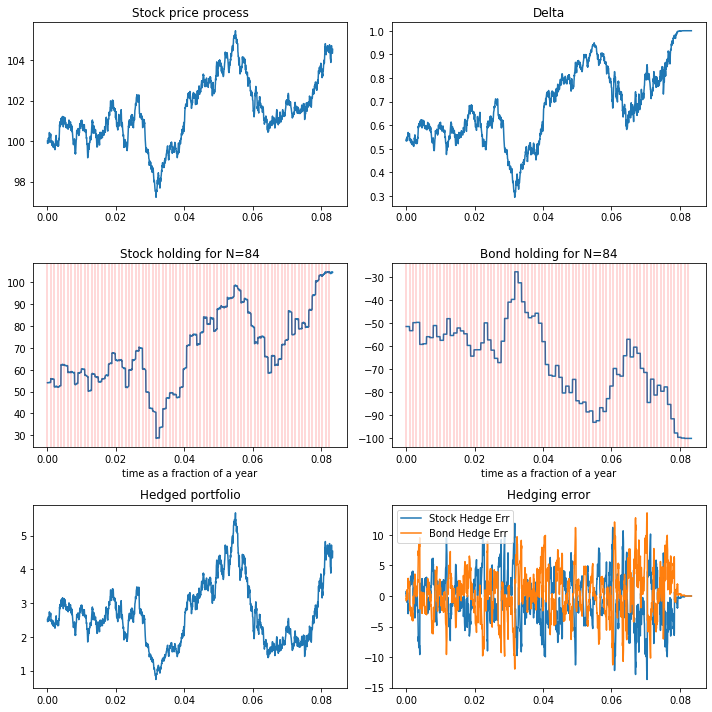

In [68]:
plt.figure(tight_layout=True, figsize=(10, 10))
plt.subplot(321)
plt.plot(T, blackscholespath)
plt.title('Stock price process')
plt.subplot(322)
plt.plot(T, deltas)
plt.title('Delta')
plt.subplot(323)
plt.plot(T, stock_holdings)
for xc in T[hedge_list]:
    plt.axvline(x=xc, color='r', linestyle='-', linewidth=0.3)
plt.title('Stock holding for N=84')
plt.xlabel("time as a fraction of a year")
plt.subplot(324)
plt.plot(T, bond_holdings)
for xc in T[hedge_list]:
    plt.axvline(x=xc, color='r', linestyle='-', linewidth=0.3)
plt.title('Bond holding for N=84')
plt.xlabel("time as a fraction of a year")
plt.subplot(325)
plt.plot(T, hedged_portfolios)
plt.title('Hedged portfolio')
plt.subplot(326)
plt.plot(T, stockhedge_errors, label='Stock Hedge Err')
plt.plot(T, bondhedge_errors, label='Bond Hedge Err')
plt.legend()
plt.title('Hedging error')
plt.show()

## multple paths for N = 21 and N=84

In [69]:
paths = 50000
steps = 21 * 84 #1000

T, W_T = simulate_Brownian_Motion(paths, steps, maturity)

dt = maturity / steps
blackscholespath = S0*np.exp((r-sigma**2/2)*T + sigma*W_T)

In [70]:
#50000 paths each with 1764 intervals
blackscholespath.T.shape

(1765, 50000)

In [71]:
#perform dynamic hedgeing for N=21

deltas = []
stockhedge_errors_21 = []
bondhedge_errors_21 = []
hedged_portfolios_21 = []
stock_holdings = []
bond_holdings = []
hedge_count = 0

N = 21 #number of hedging steps

for i, (t, S_t) in enumerate(zip(T, blackscholespath.T)):
    
    stock_pos = phi(S_t, K, r, sigma, maturity-t)*S_t #supposed stock pos if hedged at every instance
    bond_pos = psi_Bt(S_t, K, r, sigma, maturity-t) #supposed bond pos if hedged at every instance
    
    if (t == 0 or i%(steps/N) == 0) and i!= steps :
        #at t == 0 and at every hedging step, excluding last step
        stock_holdings.append(stock_pos)
        bond_holdings.append(bond_pos)
        V_t = stock_pos + bond_pos
        hedge_count = hedge_count + 1
        
        hedged_portfolios_21.append(V_t)
        
        if t == 0.0:
            stockhedge_errors_21.append(0)
            bondhedge_errors_21.append(0)

        else:
            stockhedge_errors_21.append(prev_phi*S_t - stock_pos)
            bondhedge_errors_21.append(prev_bond_pos*np.exp(r*dt*n) - bond_pos)
        
        #only update at hedging step
        prev_phi = phi(S_t, K, r, sigma, maturity-t)
        prev_bond_pos = bond_pos
        n=0 #reset n to be (number of steps between 1 hedge and another hedge)

    if (t > 0 and  i%(steps/N) != 0) or i==steps:
    #at every step :
        n = n + 1
        V_t = prev_phi* S_t + prev_bond_pos *np.exp(r*dt*n)
        stock_holdings.append(prev_phi* S_t)
        bond_holdings.append(prev_bond_pos *np.exp(r*dt*n))
    
        hedged_portfolios_21.append(V_t)
        
        stockhedge_errors_21.append(prev_phi*S_t - stock_pos)
        bondhedge_errors_21.append(prev_bond_pos*np.exp(r*dt*n) - bond_pos)
    
    deltas.append(phi(S_t, K, r, sigma, maturity-t))

C:\Users\Statistician\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\Statistician\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


In [72]:
#perform dynamic hedgeing for N=84

deltas = []
stockhedge_errors_84 = []
bondhedge_errors_84 = []
hedged_portfolios_84 = []
stock_holdings = []
bond_holdings = []
hedge_count = 0

N = 84 #number of hedging steps

for i, (t, S_t) in enumerate(zip(T, blackscholespath.T)):
    
    stock_pos = phi(S_t, K, r, sigma, maturity-t)*S_t #supposed stock pos if hedged at every instance
    bond_pos = psi_Bt(S_t, K, r, sigma, maturity-t) #supposed bond pos if hedged at every instance
    
    if (t == 0 or i%(steps/N) == 0) and i!= steps :
        #at t == 0 and at every hedging step, excluding last step
        stock_holdings.append(stock_pos)
        bond_holdings.append(bond_pos)
        V_t = stock_pos + bond_pos
        hedge_count = hedge_count + 1
        
        hedged_portfolios_84.append(V_t)
        
        if t == 0.0:
            stockhedge_errors_84.append(0)
            bondhedge_errors_84.append(0)

        else:
            stockhedge_errors_84.append(prev_phi*S_t - stock_pos)
            bondhedge_errors_84.append(prev_bond_pos*np.exp(r*dt*n) - bond_pos)
        
        #only update at hedging step
        prev_phi = phi(S_t, K, r, sigma, maturity-t)
        prev_bond_pos = bond_pos
        n=0 #reset n to be (number of steps between 1 hedge and another hedge)

    if (t > 0 and  i%(steps/N) != 0) or i==steps:
    #at every step :
        n = n + 1
        V_t = prev_phi* S_t + prev_bond_pos *np.exp(r*dt*n)
        stock_holdings.append(prev_phi* S_t)
        bond_holdings.append(prev_bond_pos *np.exp(r*dt*n))
    
        hedged_portfolios_84.append(V_t)
        
        stockhedge_errors_84.append(prev_phi*S_t - stock_pos)
        bondhedge_errors_84.append(prev_bond_pos*np.exp(r*dt*n) - bond_pos)
    
    deltas.append(phi(S_t, K, r, sigma, maturity-t))

C:\Users\Statistician\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\Statistician\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


In [73]:
#call payoff from 50000 runs
call_payoff = blackscholespath[:, -1] - 100
call_payoff = np.where(call_payoff < 0, 0, call_payoff )
call_payoff

array([0.        , 9.86522157, 1.04282859, ..., 0.56610465, 4.49238864,
       8.24713447])

In [74]:
#50000 runs of hedged portfolio with the hedging errors removed at options expiry
hedged_portfolios_84[-1] - (stockhedge_errors_84[-1] + bondhedge_errors_84[-1])

array([0.        , 9.86522157, 1.04282859, ..., 0.56610465, 4.49238864,
       8.24713447])

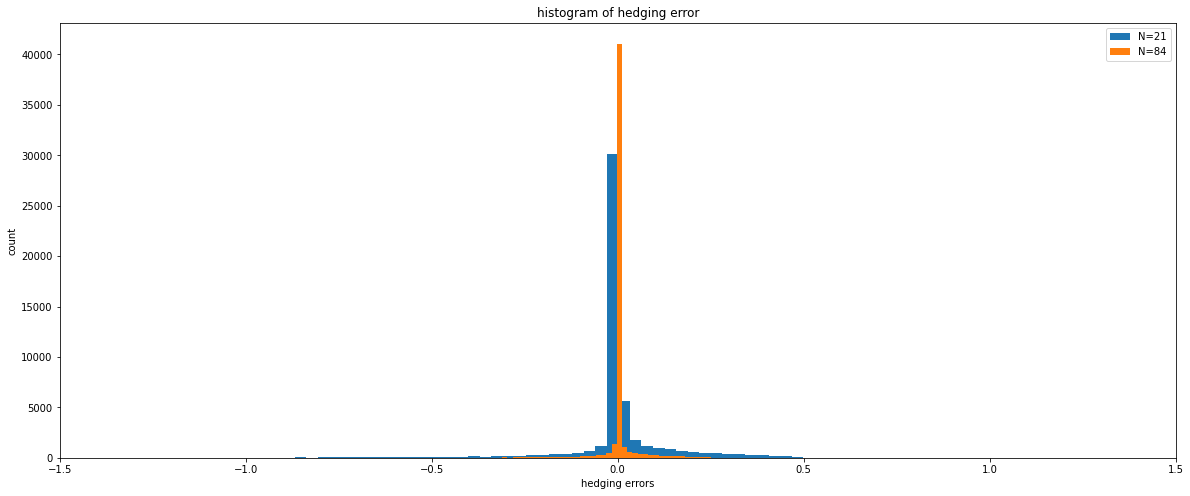

In [75]:
plt.figure(figsize = (20, 8))
plt.hist(stockhedge_errors_21[-1] + bondhedge_errors_21[-1], bins = 100, label = "N=21")
plt.hist(stockhedge_errors_84[-1] + bondhedge_errors_84[-1], bins = 100, label = "N=84")
plt.legend()
plt.ylabel("count")
plt.xlabel("hedging errors")
plt.xlim([-1.5, 1.5])
plt.title("histogram of hedging error")
plt.show()